In [36]:
from data_pre_processing import *
from pair_finder import *
from back_tester import *
import itertools

# Load data 
---

In [37]:
# #Manual adjustments
# import pandas as pd

# # Load dataset (replace with actual file path if loading from a CSV file)
# df = pd.read_csv("binance_data/Staked_ETH_Bybit/BYBIT_ETHUSDT, 30_1dfe3.csv")  # Replace with actual file path if needed

# # Convert 'time' column to datetime format and rename it
# df['Open Time'] = pd.to_datetime(df['time'], unit='s')

# # Drop the old 'time' column if needed
# df = df.drop(columns=['time'])

# #Rename close to Close
# df = df.rename(columns={'close': 'Close'})

# # Reorder columns to make 'Open Time' the first column
# column_order = ['Open Time'] + [col for col in df.columns if col != 'Open Time']
# df = df[column_order]

# cutoff_time = pd.Timestamp("2024-12-31 23:30:00")

# # Filter the dataframe to only include rows up to the cutoff time
# df = df[df['Open Time'] <= cutoff_time]


# df.to_csv("binance_data/Staked_ETH_Bybit/BYBIT_ETHUSDT, 30_1dfe3.csv", index=False)


In [38]:
# df = pd.read_csv("binance_data/Staked_ETH_Bybit/BYBIT_STETHUSDT, 30_fd7e3.csv")  # Replace with actual file path if needed
# df

In [39]:
# #Merge dataframes

# merge_ohlc_closing_prices("binance_data/Staked_ETH_Bybit")

In [40]:
prices = pd.read_csv("binance_data/Staked_ETH_Bybit/merged_closing_prices.csv", index_col=0, parse_dates=True)

In [41]:
prices

,"BYBIT_STETH/USDT, 30_fd7e3","BYBIT_ETH/USDT, 30_1dfe3"
timestamp,,
2024-01-01 16:30:00,2312.58,2309.90
2024-01-01 17:00:00,2313.49,2314.71
2024-01-01 17:30:00,2311.86,2313.57
2024-01-01 18:00:00,2329.05,2329.38
2024-01-01 18:30:00,2325.79,2326.79
...,...,...
2024-12-31 21:30:00,3351.29,3352.69
2024-12-31 22:00:00,3333.82,3338.94
2024-12-31 22:30:00,3337.37,3339.99


Text(0.5, 1.0, 'BYBIT_STETH/USDT, 30_fd7e3 and BYBIT_ETH/USDT, 30_1dfe3 Closing Prices')

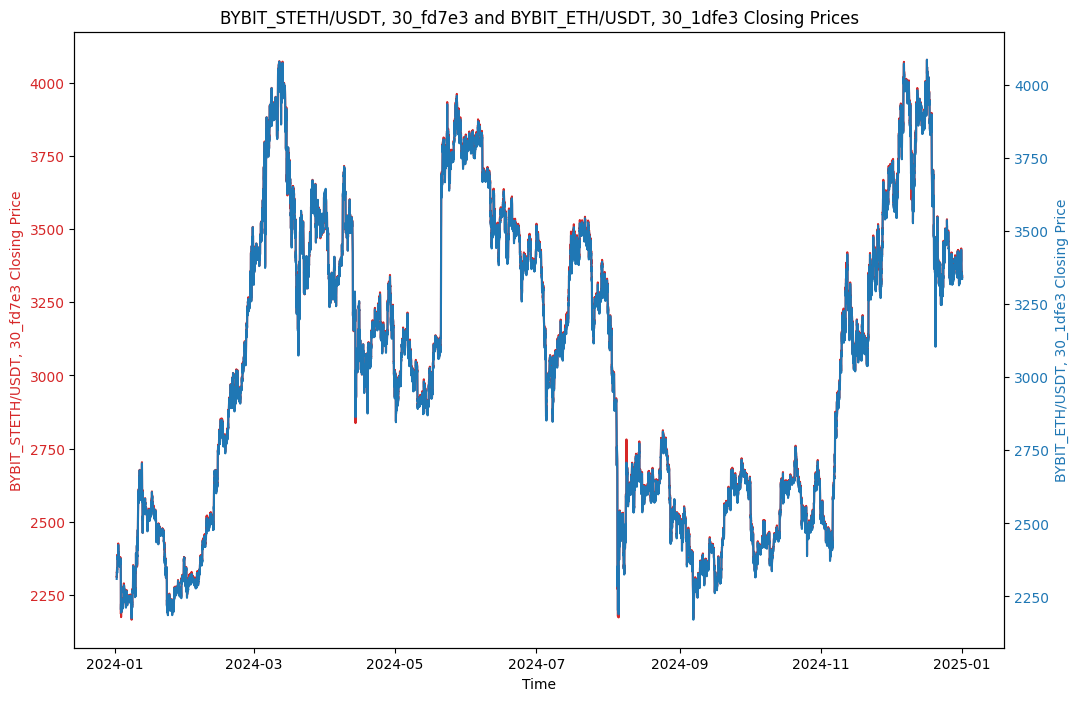

In [42]:
#Plot the closing prices of the merged data using different y axis

crypto_1 = prices.columns[0]
crypto_2 = prices.columns[1]

fig, ax1 = plt.subplots()

#Set size of the plot
fig.set_size_inches(12, 8)

color = 'tab:red'
ax1.set_xlabel('Time')
ax1.set_ylabel(f'{crypto_1} Closing Price', color=color)
ax1.plot(prices.index, prices[crypto_1], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel(f'{crypto_2} Closing Price', color=color)
ax2.plot(prices.index, prices[crypto_2], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Add a title to the plot
plt.title(f'{crypto_1} and {crypto_2} Closing Prices')







In [43]:
#Calculate correlation matrix
correlation_matrix = prices.corr()
correlation_matrix

,"BYBIT_STETH/USDT, 30_fd7e3","BYBIT_ETH/USDT, 30_1dfe3"
"BYBIT_STETH/USDT, 30_fd7e3",1.000000,0.999984
"BYBIT_ETH/USDT, 30_1dfe3",0.999984,1.000000


# Test for pairs
---

* ## Apply correlation filter

In [44]:

# Pre-filter: Calculate correlation matrix and select pairs with high correlation
corr_threshold = 0.8
corr_matrix, high_corr_pairs = filter_high_correlation_pairs(prices, threshold=corr_threshold)
print(f"\nPairs with correlation >= {corr_threshold}:")
for pair in high_corr_pairs:
    print(f"{pair[0]} & {pair[1]}: correlation = {pair[2]:.4f}")

# Cointegration test
cointegrated_pairs, pvalue_matrix, residuals_df = find_cointegrated_pairs(prices, high_corr_pairs,significance=0.05)
#cointegrated_pairs, window_results = find_cointegrated_pairs_windows(prices, high_corr_pairs, significance=0.05, window_size=720, min_pass_fraction=0.5)



Pairs with correlation >= 0.8:
BYBIT_STETH/USDT, 30_fd7e3 & BYBIT_ETH/USDT, 30_1dfe3: correlation = 1.0000

Cointegrated pairs (from pre-filtered high-correlation pairs):
BYBIT_STETH/USDT, 30_fd7e3 & BYBIT_ETH/USDT, 30_1dfe3: p-value = 0.0000, correlation = 1.0000


In [45]:
high_corr_pairs = []

* ## Test cointegration in windows

In [46]:
#Params
window_size = 336
min_pass_fraction = 0.5
significance = 0.05

#Find cointegrated pairs
cointegrated_pairs, window_results = find_cointegrated_pairs_windows(prices, high_corr_pairs, significance, window_size, min_pass_fraction)


Cointegrated pairs (across windows):
BYBIT_STETH/USDT, 30_fd7e3 & BYBIT_ETH/USDT, 30_1dfe3: pass fraction=0.75, avg p-value=0.0526, correlation=0.0


In [47]:
#Window results
window_results

{('BYBIT_STETH/USDT, 30_fd7e3',
  'BYBIT_ETH/USDT, 30_1dfe3'): [np.float64(7.375580075707076e-05), np.float64(8.707656210183395e-12), np.float64(0.1421615907710101), np.float64(0.03667272491017141), np.float64(0.05572129709245374), np.float64(0.11703213166694182), np.float64(0.05000601496036588), np.float64(7.929084719073408e-05), np.float64(4.978006554920961e-13), np.float64(2.2025236272920452e-05), np.float64(0.005656340136632998), np.float64(0.5644926390694516), np.float64(4.258258781155621e-06), np.float64(0.06609276226533169), np.float64(0.00019382333670909206), np.float64(0.11939240328234096), np.float64(0.0004781835479854602), np.float64(0.00974542136723761), np.float64(1.0738888585252424e-06), np.float64(0.6232426490793375), np.float64(6.560013375871463e-06), np.float64(0.08181577391207662), np.float64(0.0004476579834873927), np.float64(0.07992332160249599), np.float64(0.006912430144862062), np.float64(0.028384231531680414), np.float64(4.150422795118155e-05), np.float64(0.00470

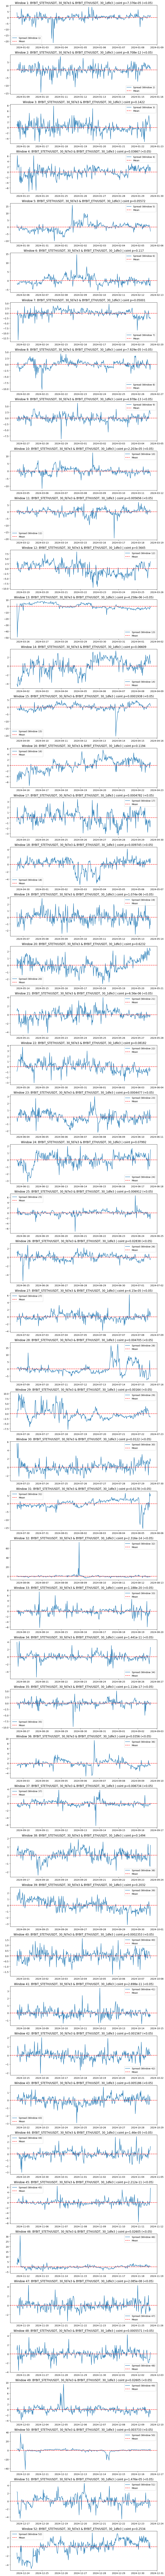

('BYBIT_STETH/USDT, 30_fd7e3', 'BYBIT_ETH/USDT, 30_1dfe3')
Number of windows: 52


In [48]:
#Plot windows

windows = split_price_series_into_windows(prices, window_size)


crypto_1 = prices.columns[0]
crypto_2 = prices.columns[1]

#For ICP/USDT_2024_1h', 'ADA/USDT_2024_1h
plot_spread_in_windows(crypto_1, crypto_2, windows, window_results, significance=0.05) #These spreads look like they are standardised, but they are not. They are centered around 0 due to the inclusion of the intercept term in the cointegration test. The spread is still in the original units of the data.
#plot_spread_in_windows('S1', 'S2', windows, window_results, significance=0.05)

#Check number of windows
#-----------------------
window_results.values()

#Count number of values in window_results
num_windows = 0
for key in window_results.keys():
    print(key)
    num_windows += len(window_results[key])

print(f"Number of windows: {num_windows}")

* ### Check resiuals

In [49]:
# #If you suspect daily intraday patterns, using 24 lags is a natural choice: it checks each hour in a 24-hour cycle for dependence.
# #If your sample is large enough (covering many days/weeks), 24 lags is typically enough to detect standard intraday correlation
# analyze_residuals(residuals_df, lags = 24)

# Validation of cointegration methods using data designed for cointegration
---

In [50]:
# import numpy as np
# import pandas as pd

# def generate_cointegrated_data(
#     n=720,  # number of data points
#     alpha=5.0,
#     beta=1.5,
#     phi=0.8, #manually set to 0.8 so that the spread is stationary (no unit root)
#     seed=42
# ):
#     """
#     Generate two cointegrated series: S1 (random walk) and S2 (linear function of S1 + stationary AR(1) noise).
    
#     Parameters:
#         n (int): Number of observations (e.g. 720 for ~1 month of hourly data).
#         alpha (float): Intercept term for S2.
#         beta (float): S2 coefficient for S1.
#         phi (float): AR(1) coefficient for the noise in S2 - beta*S1. Must be <1 in abs value for stationarity.
#         seed (int): Random seed for reproducibility.

#     Returns:
#         pd.DataFrame with columns ['S1', 'S2'] representing the two cointegrated time series.
#     """
#     rng = np.random.default_rng(seed)
    
#     # 1) Generate S1 as a random walk
#     #   S1_t = S1_{t-1} + e1_t
#     e1 = rng.normal(loc=0.0, scale=1.0, size=n)
#     S1 = np.cumsum(e1)  # cumsum => random walk
    
#     # 2) Generate a stationary AR(1) noise for the spread
#     #   ARnoise_t = phi * ARnoise_{t-1} + e2_t
#     e2 = rng.normal(loc=0.0, scale=1.0, size=n)
#     ARnoise = np.zeros(n)
#     for t in range(1, n):
#         ARnoise[t] = phi * ARnoise[t-1] + e2[t]
#     # ARnoise is stationary if |phi| < 1
    
#     # 3) Define S2 = alpha + beta*S1 + AR(1) noise
#     S2 = alpha + beta*S1 + ARnoise
    
#     # Put them in a DataFrame
#     df = pd.DataFrame({'S1': S1, 'S2': S2})
#     return df

# # Example usage
# if __name__ == "__main__":
#     df_cointegrated = generate_cointegrated_data(n=720)
#     print(df_cointegrated.head(10))


In [51]:
# # Suppose df has columns: 'S1', 'S2'
# alpha = 5.0
# beta = 1.5

# # Calculate the spread: S2 - (alpha + beta * S1)
# df_cointegrated['spread'] = df_cointegrated['S2'] - alpha - beta * df_cointegrated['S1']

# # Plot
# plt.figure(figsize=(10,6))
# plt.plot(df_cointegrated['spread'], label='Spread = S2 - alpha - beta*S1')
# plt.axhline(df_cointegrated['spread'].mean(), color='red', linestyle='--', label='Mean')
# plt.title('Spread Over Time')
# plt.legend()
# plt.show()


In [52]:
# cointegrated_pairs, window_results = find_cointegrated_pairs_windows(df_cointegrated, high_corr_pairs, significance=0.05, window_size=240, min_pass_fraction=0.5)

In [53]:
# window_results